# **1. Perkenalan Dataset**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset/natural_disasters_2024.csv'

**Sumber data :** https://www.kaggle.com/datasets/umeradnaan/prediction-of-disaster-management-in-2024

**Tentang dataset**

Kumpulan data yang dibuat memodelkan terjadinya bencana alam pada tahun 2024 hingga awal tahun 2025. Dataset ini mencakup data yang dihasilkan secara acak yang menjelaskan sejumlah topik terkait bencana, termasuk jenis bencana, lokasi, magnitudo, dan efek yang ditimbulkannya. Penelitian tentang teknik manajemen bencana, analitik, dan pemodelan pembelajaran mesin dapat menggunakan dataset ini. Kolom-kolom tersebut dijabarkan sebagai berikut:
* Disaster_ID: Nomor khusus yang diberikan untuk setiap kejadian bencana.
* Jenis_Bencana(Disaster_Type): Jenis bencana, seperti badai, angin topan, banjir, gempa bumi, atau kebakaran.
* Lokasi(Location): Tempat terjadinya bencana, seperti Amerika Serikat, India, atau Tiongkok.
* Magnitudo(Magnitude): Nilai kontinu yang menyatakan intensitas atau tingkat keparahan bencana.
* Tanggal(Date): Waktu persis terjadinya bencana pada tahun 2024, yang tersebar sepanjang tahun.
* Korban jiwa(Fatalities): Jumlah total orang yang tewas akibat bencana.
* Kerugian_Ekonomi($)(Economic Loss): Proyeksi biaya fiskal bencana dalam dolar AS.

Dengan sekitar 10.000 baris, dataset ini dimaksudkan untuk berukuran sekitar 300 KB. Dataset ini dapat digunakan untuk melatih model prediktif untuk kesiapsiagaan dan rencana penanggulangan bencana, memeriksa tren, dan memodelkan skenario tanggap bencana.

# **2. Import Library**

Mengimpor beberapa library yang dibutuhkan untuk analisis data dan pengembangan model machine learning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

In [4]:
# memuat dan menyimpan dataset ke dalam variabel df
df = pd.read_csv(path)
df.head()

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,1,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,2,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,3,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,4,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,5,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Menampilkan dataset
df

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,1,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,2,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,3,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,4,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,5,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08
...,...,...,...,...,...,...,...
9995,9996,Hurricane,China,3.092801,2025-02-20 11:00:00,7837,1.067089e+07
9996,9997,Tornado,Brazil,6.652682,2025-02-20 12:00:00,6288,1.414537e+08
9997,9998,Earthquake,Indonesia,6.824656,2025-02-20 13:00:00,673,8.330828e+08
9998,9999,Flood,USA,6.381571,2025-02-20 14:00:00,323,9.502971e+08


In [ ]:
# Melihat informasi singkat mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Disaster_ID       10000 non-null  int64  
 1   Disaster_Type     10000 non-null  object 
 2   Location          10000 non-null  object 
 3   Magnitude         10000 non-null  float64
 4   Date              10000 non-null  object 
 5   Fatalities        10000 non-null  int64  
 6   Economic_Loss($)  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


**Jumlah Baris** : 10000

**Jumlah Kolom** : 6

**Tipe Data** : Numerik dan Kategorikal

In [ ]:
# Melihat data yang kosong
df.isnull().sum()

,0
Disaster_ID,0
Disaster_Type,0
Location,0
Magnitude,0
Date,0
Fatalities,0
Economic_Loss($),0


In [ ]:
# Melihat deskripsi singkat data
df.describe()

,Disaster_ID,Magnitude,Fatalities,Economic_Loss($)
count,10000.00000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,5.559173,4984.928900,5.049752e+08
std,2886.89568,2.619304,2900.114029,2.861325e+08
min,1.00000,1.000656,0.000000,1.036597e+06
25%,2500.75000,3.263217,2481.750000,2.636352e+08
50%,5000.50000,5.589578,4947.000000,5.078407e+08
75%,7500.25000,7.829268,7511.250000,7.527256e+08
max,10000.00000,9.999671,9999.000000,9.998528e+08


In [ ]:
# Cek data duplikat
df.duplicated().sum()

0

In [ ]:
# Melihat nilai pada atribut bertipe data kategorikal
numeric_features = df.select_dtypes(include=['number']).columns

tot_len= 0
for i in df.columns:
    if i not in numeric_features:
        print(f'\033[31m{i.upper()}\033[0m'.center(50, ' '))
        print(df[i].value_counts())
        tot_len= tot_len+ df[i].nunique()
        print()
        print()

              DISASTER_TYPE              
Disaster_Type
Earthquake    2036
Flood         2018
Tornado       2012
Wildfire      1982
Hurricane     1952
Name: count, dtype: int64


                LOCATION                 
Location
Brazil       1743
India        1677
Indonesia    1649
Japan        1648
USA          1646
China        1637
Name: count, dtype: int64


                  DATE                   
Date
2024-01-01 00:00:00    1
2024-10-04 22:00:00    1
2024-10-04 15:00:00    1
2024-10-04 16:00:00    1
2024-10-04 17:00:00    1
                      ..
2024-05-18 21:00:00    1
2024-05-18 22:00:00    1
2024-05-18 23:00:00    1
2024-05-19 00:00:00    1
2025-02-20 15:00:00    1
Name: count, Length: 10000, dtype: int64




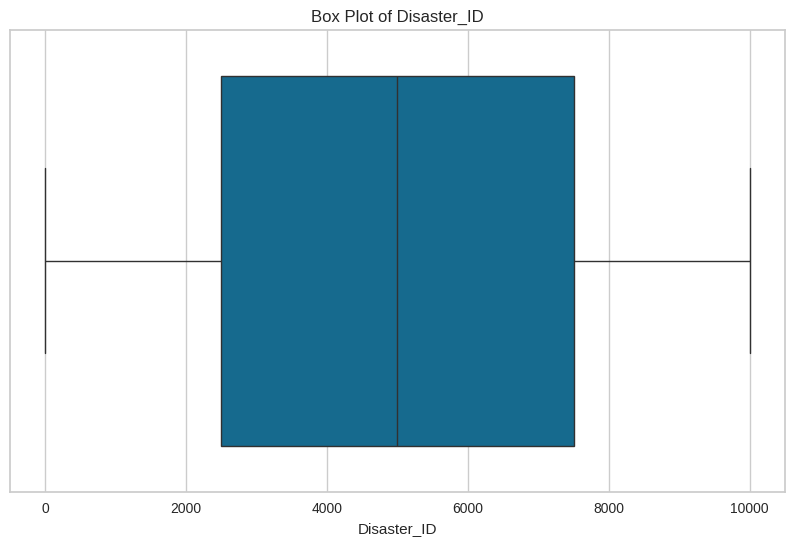

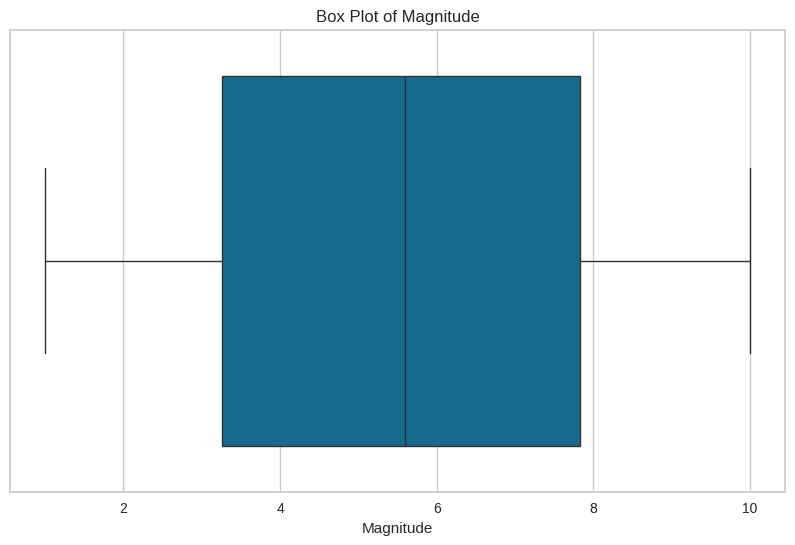

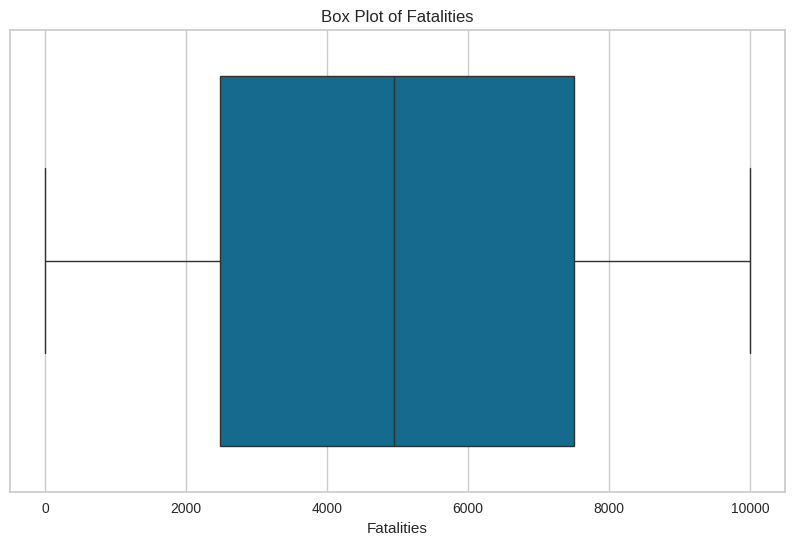

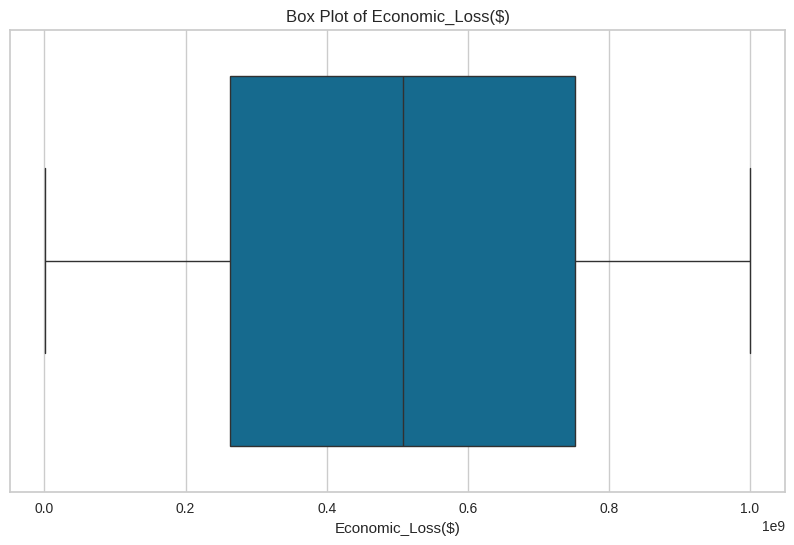

In [ ]:
# Melihat apakah ada outlier
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

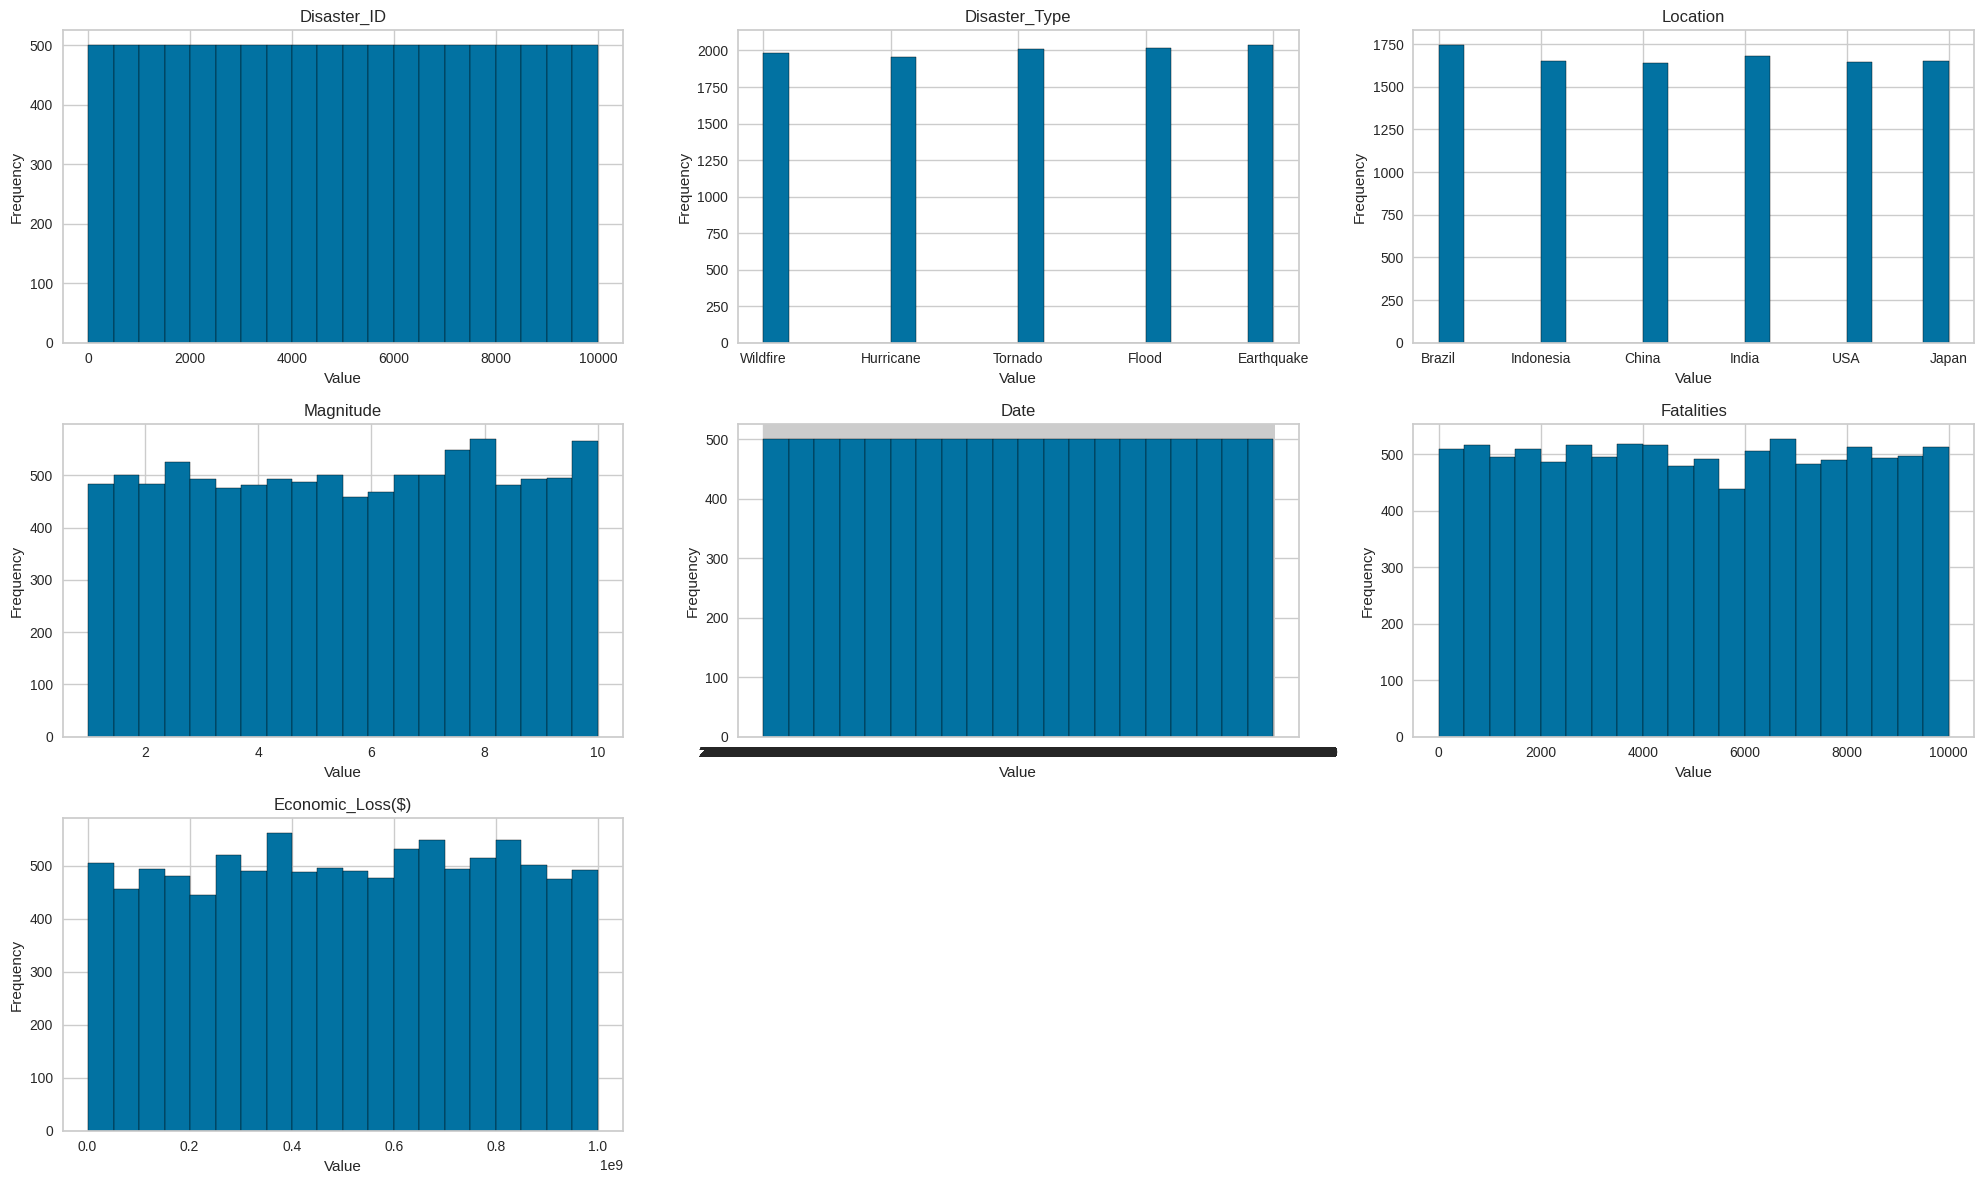

In [ ]:
# Menghitung jumlah variabel
num_vars = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 3  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

In [ ]:
numeric_features

Index(['Disaster_ID', 'Magnitude', 'Fatalities', 'Economic_Loss($)'], dtype='object')

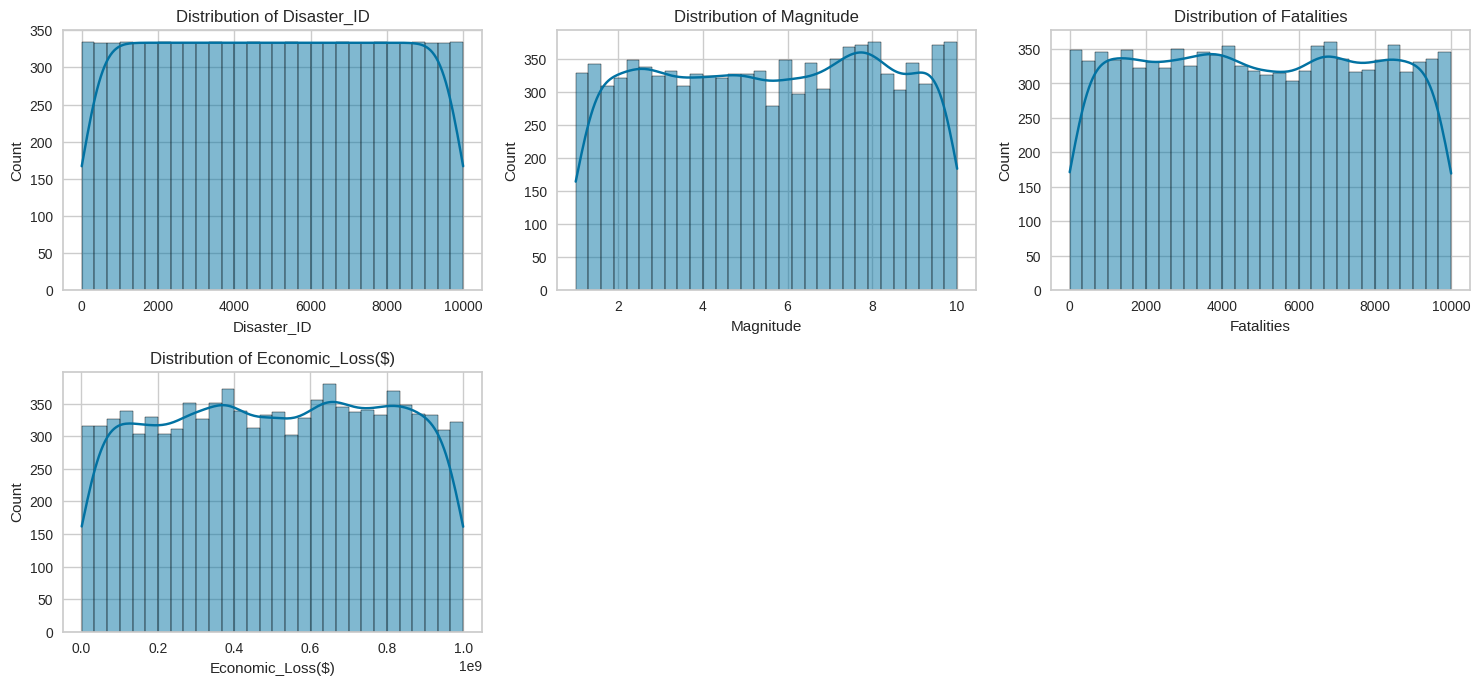

In [ ]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['Disaster_ID', 'Magnitude', 'Fatalities', 'Economic_Loss($)']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

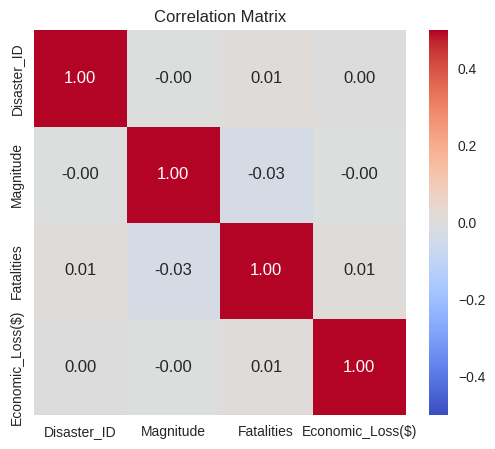

In [ ]:
# Visualisasi korelasi antar variabel
plt.figure(figsize=(6, 5))
correlation_matrix = df[numeric_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
# Menghapus kolom 'Disaster_ID' karena kolom ini tidak diperlukan
df.drop('Disaster_ID', axis=1, inplace=True)
df

,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08
...,...,...,...,...,...,...
9995,Hurricane,China,3.092801,2025-02-20 11:00:00,7837,1.067089e+07
9996,Tornado,Brazil,6.652682,2025-02-20 12:00:00,6288,1.414537e+08
9997,Earthquake,Indonesia,6.824656,2025-02-20 13:00:00,673,8.330828e+08
9998,Flood,USA,6.381571,2025-02-20 14:00:00,323,9.502971e+08


In [ ]:
# Binning data berdasar bulan dan tahun
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df.drop('Date', axis=1, inplace=True)
df

,Disaster_Type,Location,Magnitude,Fatalities,Economic_Loss($),Month,Year
0,Wildfire,Brazil,6.267393,9706,6.509790e+08,1,2024
1,Hurricane,Indonesia,6.649358,2233,5.538357e+08,1,2024
2,Tornado,China,9.724366,478,6.910998e+07,1,2024
3,Flood,India,1.702505,2867,8.474880e+08,1,2024
4,Flood,Brazil,7.917748,776,6.449297e+08,1,2024
...,...,...,...,...,...,...,...
9995,Hurricane,China,3.092801,7837,1.067089e+07,2,2025
9996,Tornado,Brazil,6.652682,6288,1.414537e+08,2,2025
9997,Earthquake,Indonesia,6.824656,673,8.330828e+08,2,2025
9998,Flood,USA,6.381571,323,9.502971e+08,2,2025


In [ ]:
# menyalin dataset untuk membuat dataset khusus yang akan diolah
clus_df = df.copy()
clus_df

,Disaster_Type,Location,Magnitude,Fatalities,Economic_Loss($),Month,Year
0,Wildfire,Brazil,6.267393,9706,6.509790e+08,1,2024
1,Hurricane,Indonesia,6.649358,2233,5.538357e+08,1,2024
2,Tornado,China,9.724366,478,6.910998e+07,1,2024
3,Flood,India,1.702505,2867,8.474880e+08,1,2024
4,Flood,Brazil,7.917748,776,6.449297e+08,1,2024
...,...,...,...,...,...,...,...
9995,Hurricane,China,3.092801,7837,1.067089e+07,2,2025
9996,Tornado,Brazil,6.652682,6288,1.414537e+08,2,2025
9997,Earthquake,Indonesia,6.824656,673,8.330828e+08,2,2025
9998,Flood,USA,6.381571,323,9.502971e+08,2,2025


In [ ]:
# Melihat kolom bertipe data kategorikal
category_features = clus_df.select_dtypes(include=['object']).columns
clus_df[category_features]

,Disaster_Type,Location
0,Wildfire,Brazil
1,Hurricane,Indonesia
2,Tornado,China
3,Flood,India
4,Flood,Brazil
...,...,...
9995,Hurricane,China
9996,Tornado,Brazil
9997,Earthquake,Indonesia
9998,Flood,USA


In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
clus_df = pd.DataFrame(clus_df)

for col in category_features:
    clus_df[col] = label_encoder.fit_transform(clus_df[col])

# Menampilkan hasil
clus_df

,Disaster_Type,Location,Magnitude,Fatalities,Economic_Loss($),Month,Year
0,4,0,6.267393,9706,6.509790e+08,1,2024
1,2,3,6.649358,2233,5.538357e+08,1,2024
2,3,1,9.724366,478,6.910998e+07,1,2024
3,1,2,1.702505,2867,8.474880e+08,1,2024
4,1,0,7.917748,776,6.449297e+08,1,2024
...,...,...,...,...,...,...,...
9995,2,1,3.092801,7837,1.067089e+07,2,2025
9996,3,0,6.652682,6288,1.414537e+08,2,2025
9997,0,3,6.824656,673,8.330828e+08,2,2025
9998,1,5,6.381571,323,9.502971e+08,2,2025


In [ ]:
# Standarisasi dengan Min-Max
scaler = MinMaxScaler()
clus_df = pd.DataFrame(scaler.fit_transform(clus_df), columns=df.columns)

clus_df

,Disaster_Type,Location,Magnitude,Fatalities,Economic_Loss($),Month,Year
0,1.00,0.0,0.585257,0.970697,0.650713,0.000000,0.0
1,0.50,0.6,0.627702,0.223322,0.553454,0.000000,0.0
2,0.75,0.2,0.969407,0.047805,0.068154,0.000000,0.0
3,0.25,0.4,0.077992,0.286729,0.847455,0.000000,0.0
4,0.25,0.0,0.768650,0.077608,0.644656,0.000000,0.0
...,...,...,...,...,...,...,...
9995,0.50,0.2,0.232486,0.783778,0.009646,0.090909,1.0
9996,0.75,0.0,0.628072,0.628863,0.140584,0.090909,1.0
9997,0.00,0.6,0.647182,0.067307,0.833032,0.090909,1.0
9998,0.25,1.0,0.597945,0.032303,0.950386,0.090909,1.0


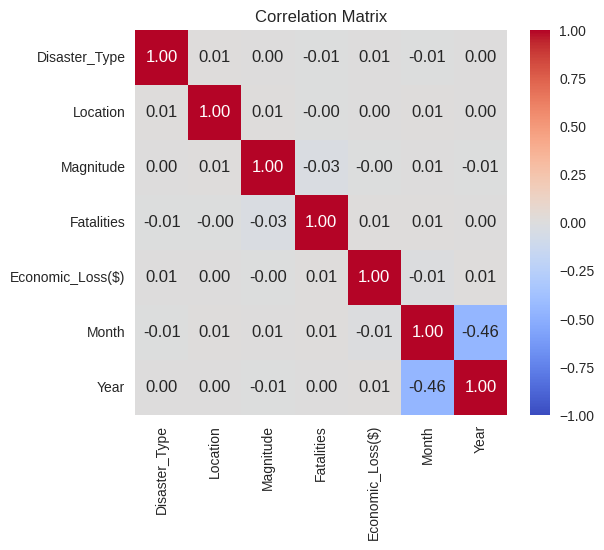

In [ ]:
# Visualisasi korelasi antar variabel
plt.figure(figsize=(6, 5))
correlation_matrix = clus_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Algoritma yang digunakan adalah **K-Means**

In [ ]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 5
kmeans_df = KMeans(n_clusters=5, random_state=0)
kmeans_df.fit(clus_df)
kmeans_df

KMeans(n_clusters=5, random_state=0)

## **b. Evaluasi Model Clustering**

Melihat silhouette skor pada model awal

In [ ]:
silhouette_avg = silhouette_score(clus_df, kmeans_df.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.15204229441439399


Menggunakan Elbow Method untuk melihat nilai K optimal

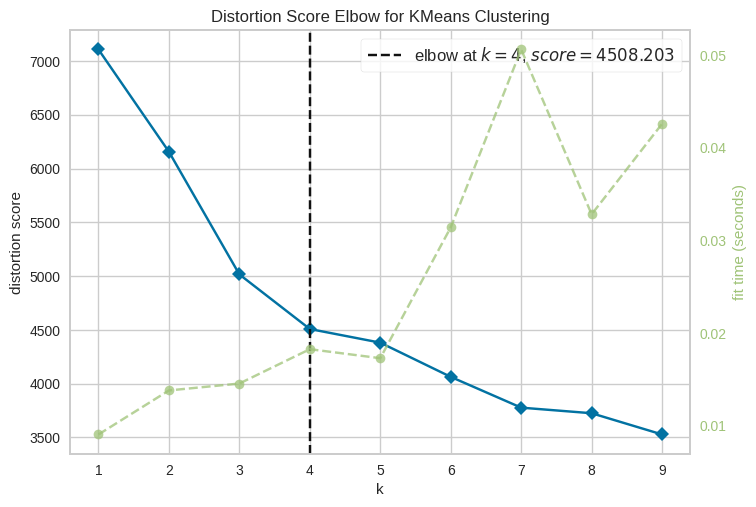

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(clus_df)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Melatih model dan menguji kembali dengan nilai K ideal yang ditunjukkan oleh Elbow Method

In [ ]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeansElbow_df = KMeans(n_clusters=4, random_state=0)
kmeansElbow_df.fit(clus_df)
kmeansElbow_df

KMeans(n_clusters=4, random_state=0)

In [ ]:
silhouette_avg = silhouette_score(clus_df, kmeansElbow_df.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.16057830394500053


## **c. Feature Selection (Opsional)**

Melakukan feature selection dengan filter method

In [ ]:
# Assuming 'kmeansElbow_df.labels_' contains your cluster assignments
y = kmeansElbow_df.labels_

# Feature selection using ANOVA F-value (for classification-like task)
selector = SelectKBest(f_classif, k=2) # Select top 5 features
X_new = selector.fit_transform(clus_df, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = clus_df.columns[selected_feature_indices]

print("Selected Features:", selected_features)

# Create a new DataFrame with the selected features
clus_df_selected = clus_df[selected_features]

Selected Features: Index(['Disaster_Type', 'Year'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Melihat nilai K ideal yang ditunjukkan oleh Elbow Method

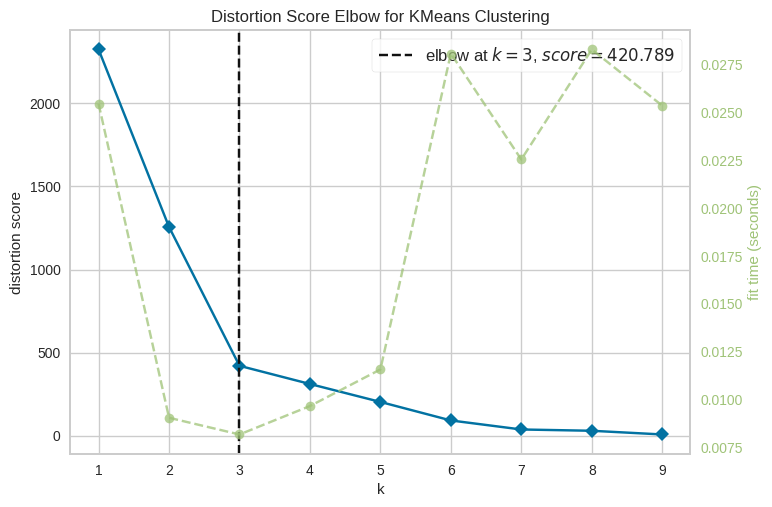

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(clus_df_selected)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Melatih model dengan fitur yang telah diseleksi dan menguji kembali dengan nilai K ideal yang ditunjukkan oleh Elbow Method

In [ ]:
kmeans_selected = KMeans(n_clusters=4, random_state=0)
kmeans_selected.fit(clus_df_selected)
kmeans_selected

silhouette_avg_selected = silhouette_score(clus_df_selected, kmeans_selected.labels_)
print(f"Silhouette Score (after feature selection): {silhouette_avg_selected}")

Silhouette Score (after feature selection): 0.6870019089134133


Memberi label cluster pada dataset

In [ ]:
result_df = df.copy()
result_df['cluster'] = kmeans_selected.labels_
result_df

,Disaster_Type,Location,Magnitude,Fatalities,Economic_Loss($),Month,Year,cluster
0,Wildfire,Brazil,6.267393,9706,6.509790e+08,1,2024,2
1,Hurricane,Indonesia,6.649358,2233,5.538357e+08,1,2024,3
2,Tornado,China,9.724366,478,6.910998e+07,1,2024,2
3,Flood,India,1.702505,2867,8.474880e+08,1,2024,0
4,Flood,Brazil,7.917748,776,6.449297e+08,1,2024,0
...,...,...,...,...,...,...,...,...
9995,Hurricane,China,3.092801,7837,1.067089e+07,2,2025,1
9996,Tornado,Brazil,6.652682,6288,1.414537e+08,2,2025,1
9997,Earthquake,Indonesia,6.824656,673,8.330828e+08,2,2025,1
9998,Flood,USA,6.381571,323,9.502971e+08,2,2025,1


## **d. Visualisasi Hasil Clustering**

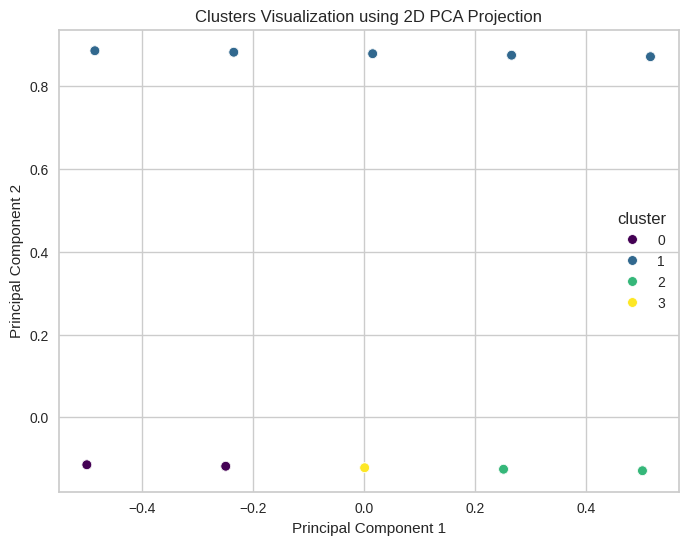

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clus_df_selected)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = kmeans_selected.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50)
plt.title('Clusters Visualization using 2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Melihat rerata dari data numerik

In [ ]:
# numeric_features = numeric_features.tolist()
numeric_features.append('cluster')

df_cluster = result_df[['Magnitude', 'Fatalities', 'Economic_Loss($)', 'cluster']].groupby('cluster').mean().T
df_cluster

cluster,0,1,2,3
Magnitude,5.576287e+00,5.514693e+00,5.582093e+00,5.508016e+00
Fatalities,4.966926e+03,5.005428e+03,4.946483e+03,5.086905e+03
Economic_Loss($),5.019063e+08,5.135642e+08,5.041701e+08,5.069250e+08


Pada semua cluster, rata-rata dari magnitude, fatalities dan economic loss memiliki nilai yang tidak jauh berbeda satu sama lain. Hanya terdapat selisih-selisih kecil yang tidak signifikan

Mengelompokkan data berdasarkan cluster

In [ ]:
clus_0 = result_df[result_df['cluster']==0]
clus_1 = result_df[result_df['cluster']==1]
clus_2 = result_df[result_df['cluster']==2]
clus_3 = result_df[result_df['cluster']==3]

Membuat fungsi untuk visualisasi (pie chart dan bar plot)

In [ ]:
def pie_chart(df, col, axes, clusterno):
    s= clusterno+ ' '+col
    cnts = df[col].value_counts()
    axes.pie(cnts, labels=cnts.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
    axes.set_title( s.upper(), fontsize=14, fontweight='bold')

def bar_plt(df, col, axes, clusterno):
    s= clusterno+ ' '+col
    cnts = df[col].value_counts().head(5)
    bars = axes.bar(cnts.index, cnts.values)
    axes.bar_label(bars)
    axes.set_title(s.upper(), fontsize=14, fontweight='bold')
    axes.get_yaxis().set_visible(False)
    axes.set_xlabel(col)

Visualisasi berdasarkan tipe bencana

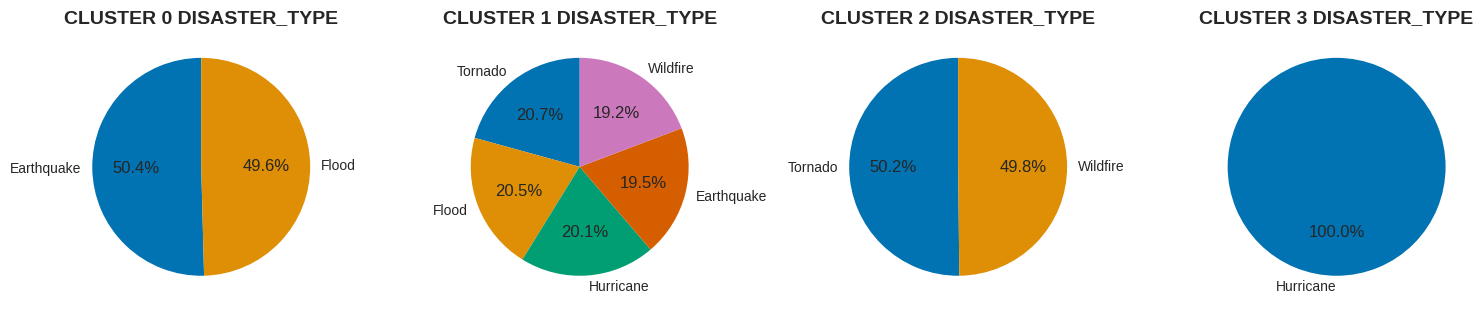

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 12))
pie_chart(clus_0, 'Disaster_Type', axes[0], 'cluster 0')
pie_chart(clus_1, 'Disaster_Type', axes[1], 'cluster 1')
pie_chart(clus_2, 'Disaster_Type', axes[2], 'cluster 2')
pie_chart(clus_3, 'Disaster_Type', axes[3], 'cluster 3')

plt.tight_layout()
plt.show()



*   Pada cluster 0, terdapat 2 tipe bencana. Yaitu gempa bumi(Earthquake) dan banjir(Flood)
*   Tipe bencana pada cluster 1 cenderung merata dan semua tipe bencana masuk ke dalam cluster ini
* Tornado dan Kebakaran Alam(Wildfire) menjadi tipe bencana yang terdapat di cluster 2
* Hanya tipe bencana badai(hurricane) yang masuk ke dalam cluster 3



Visualisasi berdasarkan lokasi bencana

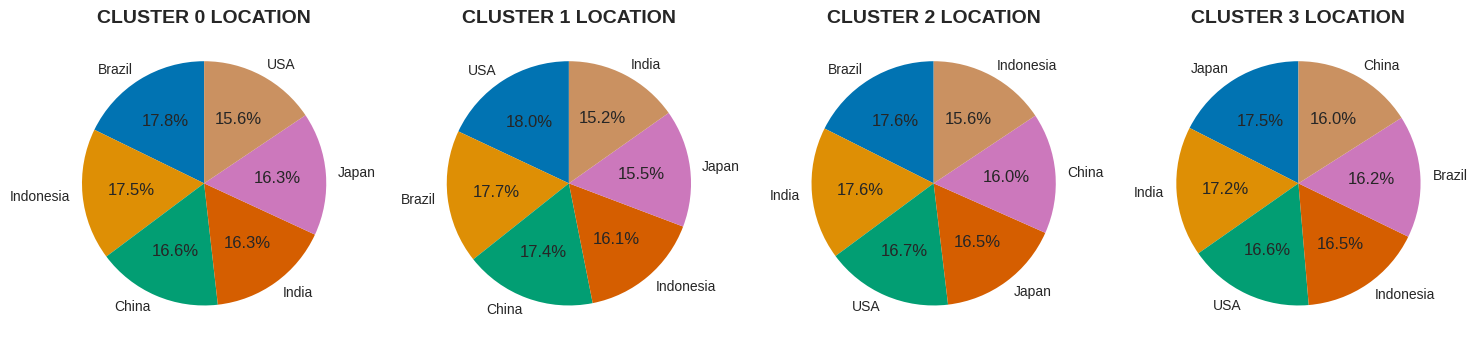

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 12))
pie_chart(clus_0, 'Location', axes[0], 'cluster 0')
pie_chart(clus_1, 'Location', axes[1], 'cluster 1')
pie_chart(clus_2, 'Location', axes[2], 'cluster 2')
pie_chart(clus_3, 'Location', axes[3], 'cluster 3')

plt.tight_layout()
plt.show()

Visualisasi berdasarkan kapan terjadi bencana (bulan dan tahun)

 Lokasi bencana di semua cluster cenderung merata diseluruh lokasi

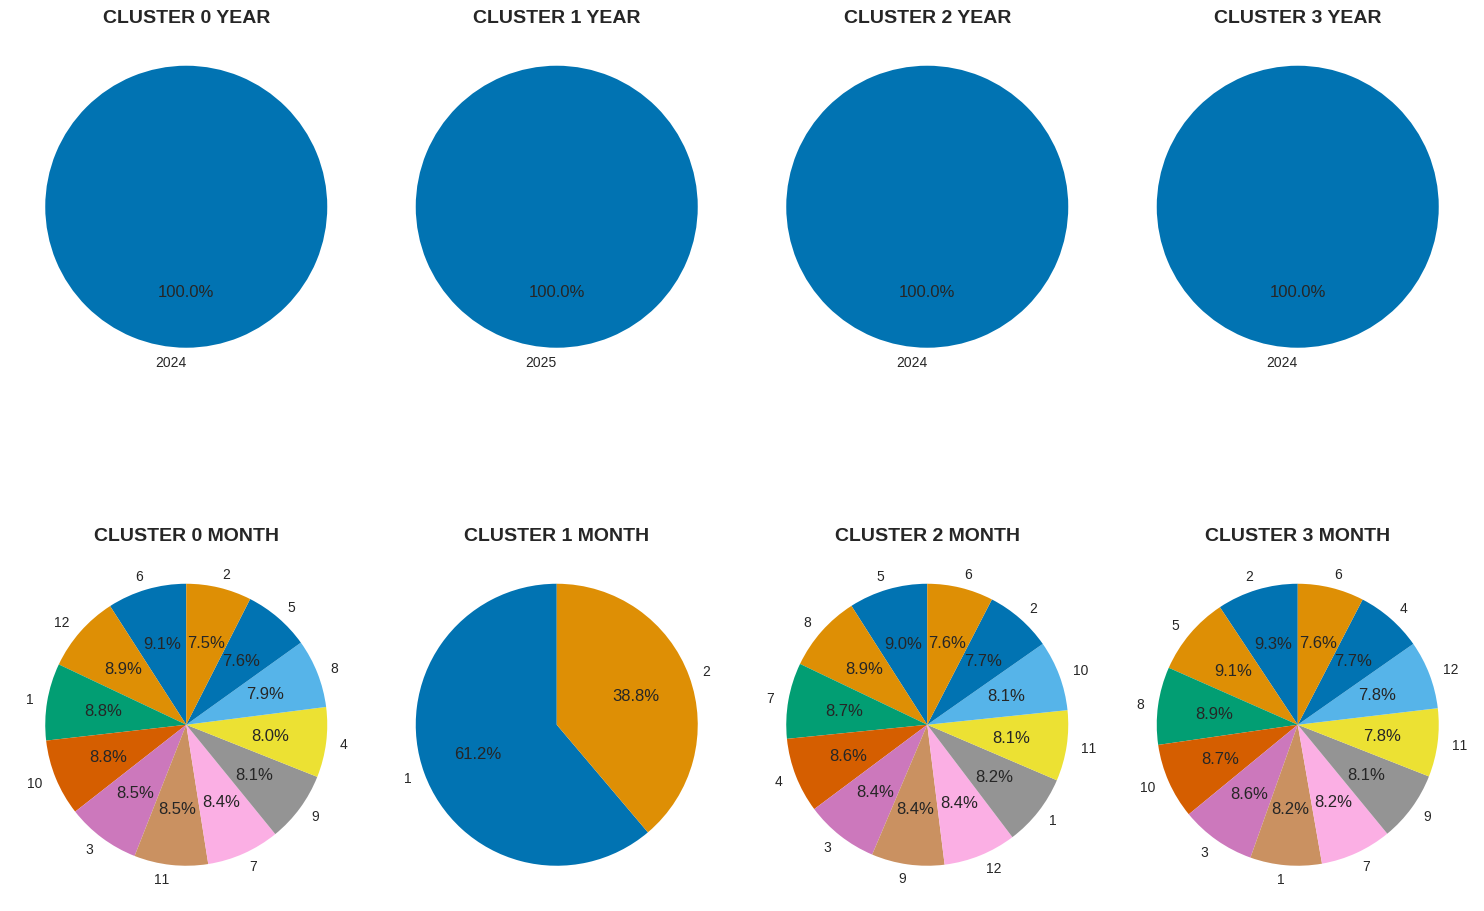

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 12))
pie_chart(clus_0, 'Year', axes[0, 0], 'cluster 0')
pie_chart(clus_1, 'Year', axes[0, 1], 'cluster 1')
pie_chart(clus_2, 'Year', axes[0, 2], 'cluster 2')
pie_chart(clus_3, 'Year', axes[0, 3], 'cluster 3')

pie_chart(clus_0, 'Month', axes[1, 0], 'cluster 0')
pie_chart(clus_1, 'Month', axes[1, 1], 'cluster 1')
pie_chart(clus_2, 'Month', axes[1, 2], 'cluster 2')
pie_chart(clus_3, 'Month', axes[1, 3], 'cluster 3')

plt.tight_layout()
plt.show()

Pada cluster 0, 2 dan 3, bencana terjadi sepanjang tahun 2024. Sedangkan pada cluster 1, bencana hanya terjadi di awal tahun 2025

**Hasil Interpretasi:**

**1. Cluster 0:** Bencana terjadi di seluruh lokasi dan di sepanjang tahun 2024. Lalu pada cluster ini, bencana hanya mencakup bencana banjir dan  gempa bumi. Oleh sebab itu, bisa jadi karena hanya 2 bencana tersebut mengapa rerata nilai economic loss cenderung lebih rendah jika dibandingkan dengan cluster lain

**2. Cluster 1:** Semua bencana masuk ke dalam cluster ini dan terjadi di semua lokasi, tetapi bencana yang masuk hanya bencana pada awal tahun 2025 saja. Oleh karena hal ini, mungkin menjadi penyebab kenapa nilai economic loss menjadi paling tinggi jika dibanding dengan cluster yang lain

**3. Cluster 2:** Bencana terjadi di seluruh lokasi dan di sepanjang tahun 2024. Lalu pada cluster ini, bencana hanya mencakup bencana tornado dan kebakaran. Tetapi dari 2 jenis bencana ini saja, menyebabkan cluster ini memiliki nilai kerusakan atau keparahan yang tertinggi dibanding cluster yang lain

**4. Cluster 3:** Bencana terjadi di seluruh lokasi dan di sepanjang tahun 2024. Lalu bencana yang masuk ke dalam cluster ini hanya hurricane(badai). Namun, dari bencana ini saja menjadikan cluster 3 sebagai cluster dengan nilai kematian akibat bencana tertinggi

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
result_df.to_csv('result_df.csv', index=False)